In [236]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [194]:
data = pd.read_csv("Churn_Modelling.csv") #reading dataset

In [195]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [156]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [157]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

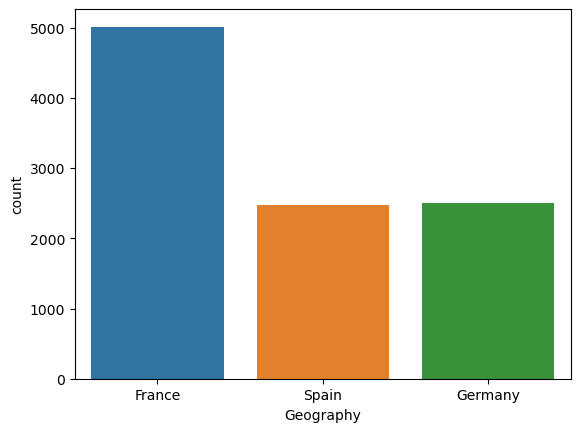

In [202]:
sns.countplot(data["Geography"])

<AxesSubplot:xlabel='Exited', ylabel='count'>

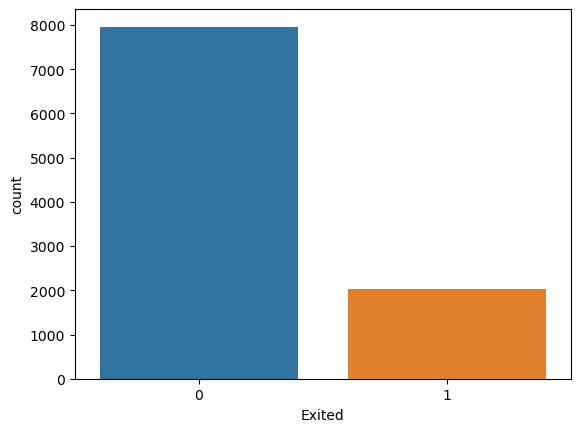

In [203]:
sns.countplot(data["Exited"])

{'whiskers': [<matplotlib.lines.Line2D at 0x14fd6915ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x14fd69244c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14fd6915d30>],
 'medians': [<matplotlib.lines.Line2D at 0x14fd6924a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x14fd6924d30>],
 'means': []}

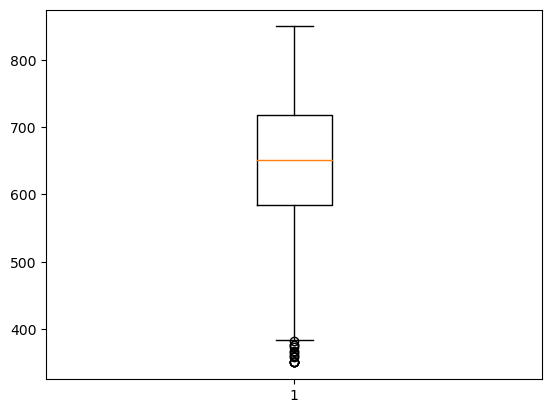

In [204]:
plt.boxplot(data["CreditScore"])

In [205]:
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])

In [206]:
x = data.drop(columns=["RowNumber","CustomerId","Surname","Geography","IsActiveMember"])
y = data["Exited"]

In [207]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

# LogisticRegression

In [208]:
lr = LogisticRegression()

In [209]:
lr.fit(x_train,y_train)

LogisticRegression()

In [210]:
y_pred = lr.predict(x_test)

In [211]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [212]:
lr.score(x_test,y_test)

0.7915

In [213]:
cm = confusion_matrix(y_test,lr.predict(x_test))
cm

array([[1556,   39],
       [ 378,   27]], dtype=int64)

In [214]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1595
           1       0.41      0.07      0.11       405

    accuracy                           0.79      2000
   macro avg       0.61      0.52      0.50      2000
weighted avg       0.72      0.79      0.73      2000



# Decision tree classifier

In [215]:
dt = tree.DecisionTreeClassifier()

In [216]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [217]:
y_pred = dt.predict(x_test)

In [218]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [219]:
dt.score(x_test,y_test)

1.0

[Text(0.5, 0.75, 'X[8] <= 0.5\ngini = 0.325\nsamples = 8000\nvalue = [6368, 1632]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6368\nvalue = [6368, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1632\nvalue = [0, 1632]')]

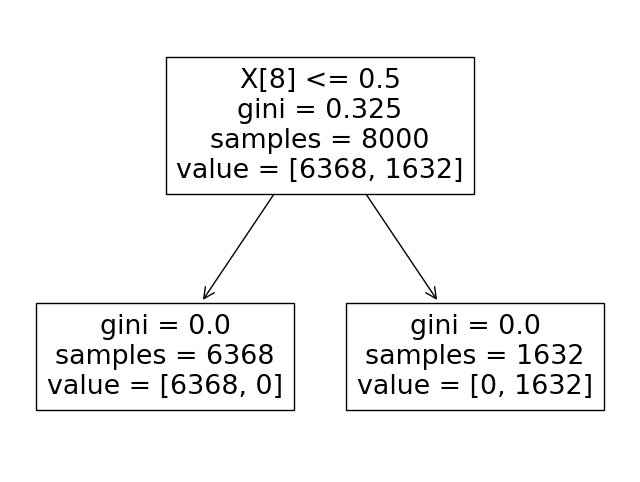

In [220]:
plt.figure(figsize=(8,6))
tree.plot_tree(dt)

In [221]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# RandomForestClassifier

In [222]:
rfc = RandomForestClassifier(n_estimators=10)

In [223]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [224]:
y_pred = rfc.predict(x_test)

In [225]:
rfc.score(x_test,y_test)

1.0

In [226]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1916707072),
 DecisionTreeClassifier(max_features='auto', random_state=971405560),
 DecisionTreeClassifier(max_features='auto', random_state=790367305),
 DecisionTreeClassifier(max_features='auto', random_state=1633961574),
 DecisionTreeClassifier(max_features='auto', random_state=1854189125),
 DecisionTreeClassifier(max_features='auto', random_state=323427578),
 DecisionTreeClassifier(max_features='auto', random_state=963095230),
 DecisionTreeClassifier(max_features='auto', random_state=40750722),
 DecisionTreeClassifier(max_features='auto', random_state=2043210687),
 DecisionTreeClassifier(max_features='auto', random_state=383091455)]

[Text(0.5909090909090909, 0.875, 'X[2] <= 44.5\ngini = 0.319\nsamples = 5086\nvalue = [6408, 1592]'),
 Text(0.36363636363636365, 0.625, 'X[1] <= 0.5\ngini = 0.224\nsamples = 3871\nvalue = [5329, 784]'),
 Text(0.18181818181818182, 0.375, 'X[8] <= 0.5\ngini = 0.284\nsamples = 1710\nvalue = [2251, 465]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.0\nsamples = 1424\nvalue = [2251, 0]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.0\nsamples = 286\nvalue = [0, 465]'),
 Text(0.5454545454545454, 0.375, 'X[8] <= 0.5\ngini = 0.17\nsamples = 2161\nvalue = [3078, 319]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.0\nsamples = 1945\nvalue = [3078, 0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.0\nsamples = 216\nvalue = [0, 319]'),
 Text(0.8181818181818182, 0.625, 'X[8] <= 0.5\ngini = 0.49\nsamples = 1215\nvalue = [1079, 808]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.0\nsamples = 687\nvalue = [1079, 0]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.0\nsamples = 528\nvalue = [0, 808]')]

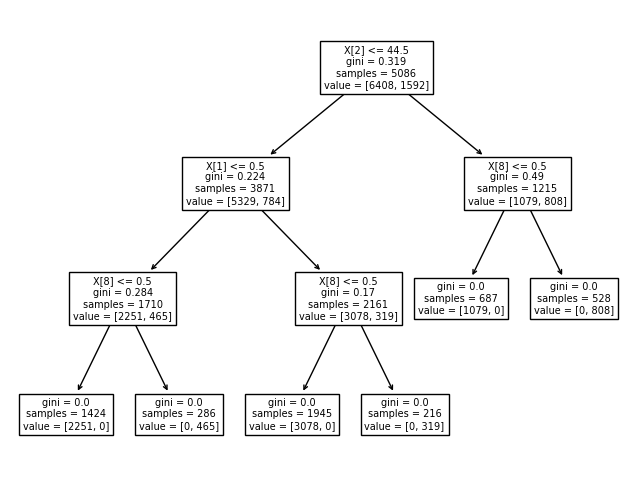

In [235]:
plt.figure(figsize=(8,6))
tree.plot_tree(rfc.estimators_[2])

In [228]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# KNN

In [229]:
knn = KNeighborsClassifier(n_neighbors=4)

In [230]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [231]:
y_pred = knn.predict(x_test)

In [232]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [233]:
knn.score(x_test,y_test)

0.7745

In [234]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1595
           1       0.18      0.03      0.05       405

    accuracy                           0.77      2000
   macro avg       0.49      0.50      0.46      2000
weighted avg       0.67      0.77      0.71      2000



# SVC

In [237]:
svc = SVC()

In [238]:
svc.fit(x_train,y_train)

SVC()

In [240]:
y_pred = svc.predict(x_test)

In [241]:
svc.score(x_test,y_test)

0.7975

In [242]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

